# Homework 3: Prediction and Classification

Due: Thursday, October 16, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW3.ipynb download=HW3.ipynb> Download this assignment</a>

#### Submission Instructions
To submit your homework, create a folder named lastname_firstinitial_hw# and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code. Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. If we cannot access your work because these directions are not followed correctly, we will not grade your work.

---


# Introduction

In this assignment you will be using regression and classification to explore different data sets.  

**First**: You will use data from before 2002 in the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) to create a metric for picking baseball players using linear regression. This is same database we used in Homework 1. This database contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more". [Documentation provided here](http://seanlahman.com/files/database/readme2012.txt).

!["Sabermetrics Science"](http://saberseminar.com/wp-content/uploads/2012/01/saber-web.jpg)
http://saberseminar.com/wp-content/uploads/2012/01/saber-web.jpg

**Second**: You will use the famous [iris](http://en.wikipedia.org/wiki/Iris_flower_data_set) data set to perform a $k$-neareast neighbor classification using cross validation.  While it was introduced in 1936, it is still [one of the most popular](http://archive.ics.uci.edu/ml/) example data sets in the machine learning community. Wikipedia describes the data set as follows: "The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres." Here is an illustration what the four features measure:

!["iris data features"](http://sebastianraschka.com/Images/2014_python_lda/iris_petal_sepal.png)
http://sebastianraschka.com/Images/2014_python_lda/iris_petal_sepal.png

**Third**: You will investigate the influence of higher dimensional spaces on the classification using another standard data set in machine learning called the The [digits data set](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).  This data set is similar to the MNIST data set discussed in the lecture. The main difference is, that each digit is represented by an 8x8 pixel image patch, which is considerably smaller than the 28x28 pixels from MNIST. In addition, the gray values are restricted to 16 different values (4 bit), instead of 256 (8 bit) for MNIST. 

**Finally**: In preparation for Homework 4, we want you to read through the following articles related to predicting the 2014 Senate Midterm Elections. 

* [Nate Silver's Methodology at while at NYT](http://fivethirtyeight.blogs.nytimes.com/methodology/)
* [How The FiveThirtyEight Senate Forecast Model Works](http://fivethirtyeight.com/features/how-the-fivethirtyeight-senate-forecast-model-works/)
* [Pollster Ratings v4.0: Methodology](http://fivethirtyeight.com/features/pollster-ratings-v40-methodology/)
* [Pollster Ratings v4.0: Results](http://fivethirtyeight.com/features/pollster-ratings-v40-results/)
* [Nate Silver versus Sam Wang](http://www.washingtonpost.com/blogs/plum-line/wp/2014/09/17/nate-silver-versus-sam-wang/)
* [More Nate Silver versus Sam Wang](http://www.dailykos.com/story/2014/09/09/1328288/-Get-Ready-To-Rumbllllle-Battle-Of-The-Nerds-Nate-Silver-VS-Sam-Wang)
* [Nate Silver explains critisims of Sam Wang](http://politicalwire.com/archives/2014/10/02/nate_silver_rebuts_sam_wang.html)
* [Background on the feud between Nate Silver and Sam Wang](http://talkingpointsmemo.com/dc/nate-silver-sam-wang-feud)
* [Are there swing voters?]( http://www.stat.columbia.edu/~gelman/research/unpublished/swing_voters.pdf)



---

## Load Python modules

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
import os
from io import StringIO
import zipfile
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 

# If this module is not already installed, you may need to install it. 
# You can do this by typing 'pip install seaborn' in the command line
import seaborn as sns 

import sklearn
import sklearn.datasets
#import sklearn.cross_validation
#from sklearn.model_selection import cross_val_score
import sklearn.model_selection
import sklearn.decomposition
#import sklearn.grid_search
import sklearn.neighbors
import sklearn.metrics

# Problem 1: Sabermetrics

Using data preceding the 2002 season pick 10 offensive players keeping the payroll under $20 million (assign each player the median salary). Predict how many games this team would win in a 162 game season.  

In this problem we will be returning to the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) that we used in Homework 1.  From this database, we will be extract five data sets containing information such as yearly stats and standing, batting statistics, fielding statistics, player names, player salaries and biographical information. You will explore the data in this database from before 2002 and create a metric for picking players. 

#### Problem 1(a) 

Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Teams.csv', 'Batting.csv', 'Salaries.csv', 'Fielding.csv', 'Master.csv' tables. Read these tables into separate pandas DataFrames with the following names. 

CSV file name | Name of pandas DataFrame
:---: | :---: 
Teams.csv | teams
Batting.csv | players
Salaries.csv | salaries
Fielding.csv | fielding
Master.csv | master

October 2020 - Some remarks:
* The 2019 data was downloaded in HW1; if for some reason the 2019 data is missing the download will be repeated here. 
* The 2019 zipfile does not contain `Master.csv` but instead `People.csv`. The record structure of both files is the same. The name of `People.csv`'s dataframe is as requested `master`.
* Meaning dataframes:
** 1
** 2
** 3


In [2]:
### Your code here ###
url='https://github.com/chadwickbureau/baseballdatabank/archive/master.zip'
# Create data directory if not already present
if not os.path.exists('data'):
    os.makedirs('data')
# Only load and unzip if not available
if not os.path.exists('data/master.zip'):
    file=requests.get(url)
    open('data/master.zip', 'wb').write(file.content)
    with zipfile.ZipFile('data/master.zip', 'r') as zip:
        zip.extractall('data')
tables=['Batting.csv', 'Fielding.csv', 'People.csv', 'Salaries.csv', 'Teams.csv']
# Find data_dir
for root, dirs, files in os.walk('data'):
    if tables[0] in files:
        table_file = os.path.join(root, tables[0])
        data_dir = os.path.dirname(table_file)

# Multiple assignment to read tables into data frames 
players, fielding, master, salaries, teams = [pd.read_csv(os.path.join(data_dir, table)) for table in tables]    
fielding.head()

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,abercda01,1871,1,TRO,NaN,SS,1,1.0,24.0,1,3,2.0,0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,2B,22,22.0,606.0,67,72,42.0,5,NaN,NaN,NaN,NaN,NaN
2,addybo01,1871,1,RC1,NaN,SS,3,3.0,96.0,8,14,7.0,0,NaN,NaN,NaN,NaN,NaN
3,allisar01,1871,1,CL1,NaN,2B,2,0.0,18.0,1,4,0.0,0,NaN,NaN,NaN,NaN,NaN
4,allisar01,1871,1,CL1,NaN,OF,29,29.0,729.0,51,3,7.0,1,NaN,NaN,NaN,NaN,NaN


#### Problem 1(b)

Calculate the median salary for each player and create a pandas DataFrame called `medianSalaries` with four columns: (1) the player ID, (2) the first name of the player, (3) the last name of the player and (4) the median salary of the player. Show the head of the `medianSalaries` DataFrame.   

In [3]:
### Your code here ###
medianSalaryPerPlayer = salaries.groupby('playerID').median()[['salary']]
common = medianSalaryPerPlayer.merge(master, on=["playerID"])
medianSalaries = common[['playerID', 'nameFirst', 'nameLast', 'salary']]
medianSalaries.head()

,playerID,nameFirst,nameLast,salary
0,aardsda01,David,Aardsma,419000.0
1,aasedo01,Don,Aase,612500.0
2,abadan01,Andy,Abad,327000.0
3,abadfe01,Fernando,Abad,525900.0
4,abbotje01,Jeff,Abbott,255000.0


#### Problem 1(c)

Now, consider only team/season combinations in which the teams played 162 Games. Exclude all data from before 1947. Compute the per plate appearance rates for singles, doubles, triples, HR, and BB. Create a new pandas DataFrame called `stats` that has the teamID, yearID, wins and these rates.

**Hint**: Singles are hits that are not doubles, triples, nor HR. Plate appearances are base on balls plus at bats.

<br>October 2020. As I have no clue about baseball, my first task is to understand the above Problem 1(c) description:
1. team/season combinations, so #games = 162/season.
2. exclude data < 1947 => following dataframes have yearID: `teams`, `salaries`, `fielding` and `players`
3. per plate appearance rates. Wikipedia: plate appearance per strike out (PA/SO) is a ratio of the number of times a batter strikes out to their plate appearance. Should be calculated for singles, doubles, triples, HR, and BB => stored in dataframes `teams` and `players`.
4. Plate appearance is `base on balls` + `at bats` => in dataframes `teams` and `players` as respectively BB and AB

In [4]:
### Your code here ###
teamsYears = teams[(teams.yearID > 1946) & (teams.G == 162)] # 1. and 2.
stats=teamsYears[['teamID', 'yearID', 'W', 'H', '2B', '3B', 'HR', 'BB', 'AB', 'SO']].copy()
stats['1B'] = stats['H'] - stats['2B'] - stats['3B'] - stats['HR'] # 3.
stats['PA'] = stats['BB'] + stats['AB'] # 4.
for  i in ['1B', '2B','3B', 'HR', 'BB']: # 3.
    stats['ratio'+ i] = stats[i] / stats['PA']
stats = stats[['teamID', 'yearID', 'W', 'ratio1B', 'ratio2B', 'ratio3B', 'ratioHR', 'ratioBB']]
stats.head()

,teamID,yearID,W,ratio1B,ratio2B,ratio3B,ratioHR,ratioBB
1366,KC1,1961,61,0.164751,0.035982,0.007829,0.014993,0.096618
1367,LAA,1961,70,0.147748,0.035708,0.003604,0.030958,0.111548
1377,BAL,1962,77,0.157816,0.037456,0.005660,0.025970,0.085900
1379,CHA,1962,85,0.165797,0.040756,0.009129,0.014998,0.101076
1380,CHN,1962,59,0.168930,0.032461,0.009275,0.020868,0.083471


The rates show the plate appearance for the 1st, 2nd and 3rd plate as well as for a home run. Following Wikipedia's definition the rate is PA/SO which is different from the rates asked to calculate.

#### Problem 1(d)

Is there a noticeable time trend in the rates computed computed in Problem 1(c)? 

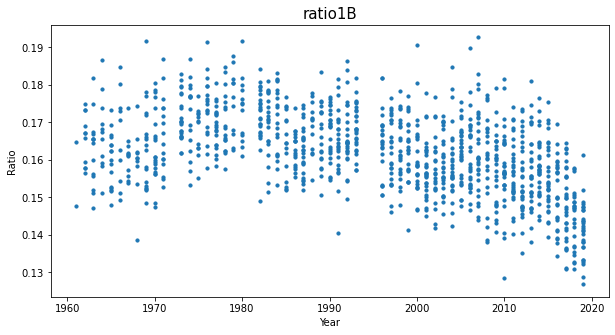

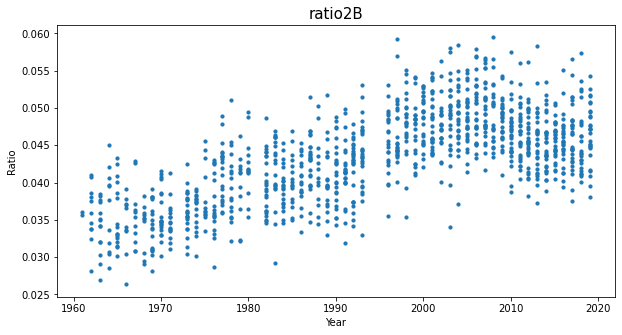

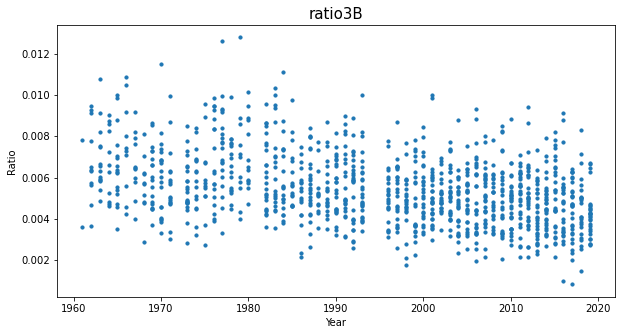

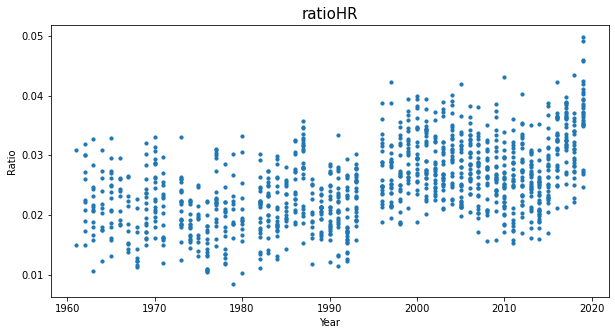

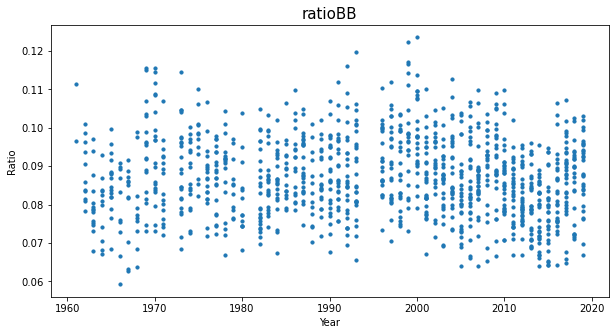

In [5]:
### Your code here ###
for i in ['ratio1B', 'ratio2B', 'ratio3B', 'ratioHR', 'ratioBB']:
    plt.figure(figsize=(10,5))
    plt.scatter(stats['yearID'], stats[i], s=10)
    plt.xlabel('Year')
    plt.ylabel('Ratio')
    plt.title(i, fontsize=15)
    plt.show()

From the above scatter plots:
* no data for 1972, 1981 1994 and 1995 (`stats['yearID'].unique()`)
* the plots 2B and HR show an increasing rate towards 2020
* the plots 1B and to a lesser extent 3B show decreasing rates in time

#### Problem 1(e) 

Using the `stats` DataFrame from Problem 1(c), adjust the singles per PA rates so that the average across teams for each year is 0. Do the same for the doubles, triples, HR, and BB rates. 

In [6]:
### Your code here ###
# Show mean across all teams per year 
stats.groupby('yearID').mean()[['ratio1B', 'ratio2B', 'ratio3B', 'ratioHR', 'ratioBB']].head()

,ratio1B,ratio2B,ratio3B,ratioHR,ratioBB
yearID,,,,,
1961,0.156249,0.035845,0.005717,0.022975,0.104083
1962,0.165632,0.035853,0.006777,0.023811,0.088590
1963,0.162467,0.034020,0.006896,0.021254,0.080336
1964,0.167251,0.036336,0.006748,0.021548,0.079152
1965,0.160042,0.035539,0.006534,0.022693,0.085745


In [7]:
# How to calculate ratio's resulting in average 0 across teams per year?
# Example to understand question:
# values = [10, 15, 6, 5, 9] => average = 45/5 = 9
# new values = [10-9, 15-9, 6-9, 5-9, 9-9] = 0/5 = 0. So subtract the average from values
#
# SOLUTION 1
statsNew = stats.groupby('yearID').apply(lambda df: df[['ratio1B', 'ratio2B', 'ratio3B', 'ratioHR', 'ratioBB']] - df[['ratio1B', 'ratio2B', 'ratio3B', 'ratioHR', 'ratioBB']].mean())  
# Join needed to prepend [ 'teamID', 'yearID', 'W'] to statsNew.
stats=stats[['teamID', 'yearID', 'W']].join(statsNew) 
stats.head()

,teamID,yearID,W,ratio1B,ratio2B,ratio3B,ratioHR,ratioBB
1366,KC1,1961,61,0.008502,0.000137,0.002113,-0.007983,-0.007465
1367,LAA,1961,70,-0.008502,-0.000137,-0.002113,0.007983,0.007465
1377,BAL,1962,77,-0.007816,0.001604,-0.001117,0.002158,-0.002690
1379,CHA,1962,85,0.000165,0.004904,0.002352,-0.008813,0.012486
1380,CHN,1962,59,0.003298,-0.003391,0.002497,-0.002944,-0.005119


In [ ]:
# SOLUTION 2
# This is the solution as given by Harvard CS109-2014:
def towardsZeroMean(df):
    basis = df[['ratio1B', 'ratio2B', 'ratio3B', 'ratioHR', 'ratioBB']] # all rates across teams per year
    means = basis.mean()
    df[['ratio1B', 'ratio2B', 'ratio3B', 'ratioHR', 'ratioBB']] = basis - means
    return df
    
stats = stats.groupby('yearID').apply(towardsZeroMean)
stats.head()

#### Problem 1(f)

Build a simple linear regression model to predict the number of wins from the average adjusted singles, double, triples, HR, and BB rates. To decide which of these terms to include fit the model to data from 2002 and compute the average squared residuals from predictions to years past 2002. Use the fitted model to define a new sabermetric summary: offensive predicted wins (OPW). Hint: the new summary should be a linear combination of one to five of the five rates.


In [8]:
### Your code here ###
# Linear Regression using sklearn. Reference: CS109-2015, Lab4-stats.ipynb, Part 3
# X is Independent variable; predictor
# Y is Dependent variable (that we want to predict)
# The train-test split is at yearID==2002
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
trainStuff = stats[stats.yearID <= 2002]
testStuff = stats[stats.yearID > 2002]
X_train = trainStuff[['ratio1B', 'ratio2B', 'ratio3B', 'ratioHR', 'ratioBB']]
X_test = testStuff[['ratio1B', 'ratio2B', 'ratio3B', 'ratioHR', 'ratioBB']]
Y_train = trainStuff.W
Y_test = testStuff.W
# Linear regression model and fit 
lm = LinearRegression()
lm.fit(X_train, Y_train)
# Two ways to calculate the mean squared error
mse1 = np.mean((Y_test - lm.predict(X_test)) ** 2)
mse2 = mean_squared_error(Y_test, lm.predict(X_test))
print('Average squared residuals: ', mse1, mse2)


Average squared residuals:  83.41892892770505 83.41892892770504


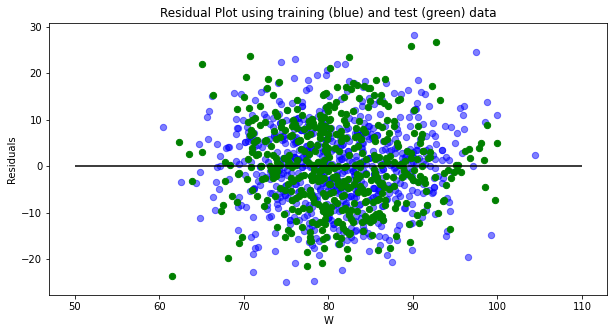

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=50, xmax = 110)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.xlabel('W')
plt.show()

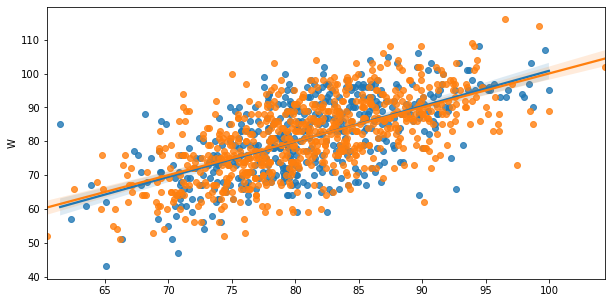

In [10]:
plt.figure(figsize=(10,5))
sns.regplot(y=Y_test, x=lm.predict(X_test))
sns.regplot(y=Y_train, x=lm.predict(X_train))
plt.show()

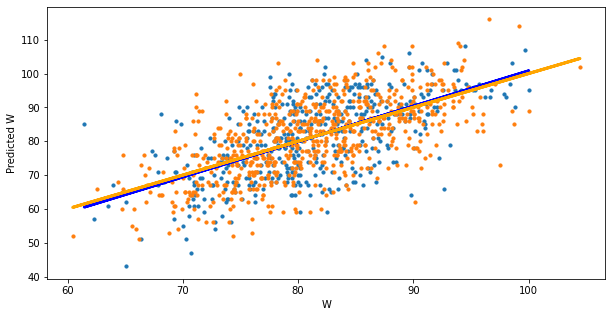

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(lm.predict(X_test), Y_test, s=10)
plt.scatter(lm.predict(X_train), Y_train, s=10)

plt.xlabel("W")
plt.ylabel("Predicted W")
#plt.title("Relationship between PTRATIO and Price")
m, b = np.polyfit(lm.predict(X_test), Y_test, 1)
plt.plot(lm.predict(X_test), (m * lm.predict(X_test)) + b , color='blue', linewidth=3)
m, b = np.polyfit(lm.predict(X_train), Y_train, 1)
plt.plot(lm.predict(X_train), (m * lm.predict(X_train)) + b , color='orange', linewidth=3)
plt.show()

** Your answer here: **
Again hard to understand the Problem 1(f) description. Based solution entirely on CS109-2015, Lab4-stats.ipynb, Part 3. 
* Why take training sets to 2002 and test sets from 2002 if data is available to 2020. 
* Is the `average squared residuals from predictions to years past 2002` the same as mean squared error?
I DON'T GET IT unfortunately (15-10-2020)

#### Problem 1(g)

Now we will create a similar database for individual players. Consider only player/year combinations in which the player had at least 500 plate appearances. Consider only the years we considered for the calculations above (after 1947 and seasons with 162 games). For each player/year compute singles, doubles, triples, HR, BB per plate appearance rates. Create a new pandas DataFrame called `playerstats` that has the playerID, yearID and the rates of these stats.  Remove the average for each year as for these rates as done in Problem 1(e). 

In [12]:
### Your code here ###
playerstats = players[(players.yearID > 1947) & (players.G == 162) & (players.BB + players.AB >= 500)].copy()
playerstats['1B'] = playerstats['H'] - playerstats['2B'] - playerstats['3B'] - playerstats['HR'] # 3.
playerstats['PA'] = playerstats['BB'] + playerstats['AB'] # 4.
for  i in ['1B', '2B','3B', 'HR', 'BB']: # 3.
    playerstats['ratio'+ i] = playerstats[i] / playerstats['PA']
playerstats = playerstats[['playerID','yearID', 'ratio1B', 'ratio2B', 'ratio3B', 'ratioHR', 'ratioBB']]
# Normalize as done for teams in Problem 1(e)
playerstatsNew = playerstats.groupby('yearID').apply(lambda df: df[['ratio1B', 'ratio2B', 'ratio3B', 'ratioHR', 'ratioBB']] - df[['ratio1B', 'ratio2B', 'ratio3B', 'ratioHR', 'ratioBB']].mean())  
playerstats=playerstats[['playerID', 'yearID']].join(playerstatsNew) 
playerstats.shape

(233, 7)

Show the head of the `playerstats` DataFrame. 

In [13]:
### Your code here ###
playerstats.head()

,playerID,yearID,ratio1B,ratio2B,ratio3B,ratioHR,ratioBB
41793,richabo01,1961,0.017477,0.000494,-0.006096,-0.005461,-0.018546
41946,woodja01,1961,-0.017477,-0.000494,0.006096,0.005461,0.018546
42082,cepedor01,1962,0.024062,-0.006264,-0.005044,0.007112,-0.042883
42404,mayswi01,1962,-0.029171,0.005963,0.000599,0.024342,0.012813
42538,robinbr01,1962,0.022985,-0.002640,0.006759,-0.011735,-0.036644


#### Problem 1(h)

Using the `playerstats` DataFrame created in Problem 1(g), create a new DataFrame called `playerLS` containing the player's lifetime stats. This DataFrame should contain the playerID, the year the player's career started, the year the player's career ended and the player's lifetime average for each of the quantities (singles, doubles, triples, HR, BB). For simplicity we will simply compute the avaerage of the rates by year (a more correct way is to go back to the totals). <br><br>
October 2020: per player columnwise calculate the average of the normalized plate appearance rates for all years. As players can have > 1 occurrence in `playerstats`, the # rows in `playerLS` is less. E.g. player
```python
playerstats[playerstats.playerID == 'bagweje01']
```
has records for 1992, 1996, 1997 and 1999.

In [14]:
### Your code here ###
import datetime
def postprocessing(df):
    df['debut']=pd.to_datetime(df['debut']).dt.year
    df['finalGame']=pd.to_datetime(df['finalGame']).dt.year
    df.rename(columns={'debut':'startYear','finalGame':'endYear'}, inplace=True) 
              
playerstatsNew=playerstats.groupby('playerID').apply(lambda df: df[['playerID', 'ratio1B', 'ratio2B', 'ratio3B', 'ratioHR', 'ratioBB']].mean())
playerLS=playerstatsNew.merge(master, on='playerID')
playerLS=playerLS[['playerID', 'debut', 'finalGame','ratio1B', 'ratio2B', 'ratio3B', 'ratioHR','ratioBB' ]]
postprocessing(playerLS)
playerLS.shape

(147, 8)

Show the head of the `playerLS` DataFrame. 

In [15]:
### Your code here ###
playerLS.head()

,playerID,startYear,endYear,ratio1B,ratio2B,ratio3B,ratioHR,ratioBB
0,abreubo01,1996,2014,-0.022295,0.008226,-0.002379,-0.003980,0.054759
1,allendi01,1963,1977,-0.005771,0.016424,0.009082,0.014189,0.012272
2,alomasa01,1964,1978,0.011155,-0.008823,-0.002639,-0.012807,-0.030193
3,alouma01,1960,1974,0.078618,0.017006,0.003056,-0.034643,-0.065462
4,bagweje01,1991,2005,-0.026475,0.008020,-0.001249,0.012158,0.054203


#### Problem 1(i)

Compute the OPW for each player based on the average rates in the `playerLS` DataFrame. You can interpret this summary statistic as the predicted wins for a team with 9 batters exactly like the player in question. Add this column to the playerLS DataFrame. Call this colum OPW.<br> October 2020: OPW = offensive predicted wins. The linear regression model `lm` is based on the trainingset before and the testset after 2002 as created in Problem 1(f)

In [16]:
### Your code here ###
meanRates=playerLS[['ratio1B', 'ratio2B', 'ratio3B', 'ratioHR', 'ratioBB']]
playerLS['OPW']=lm.predict(meanRates)
playerLS.head()

,playerID,startYear,endYear,ratio1B,ratio2B,ratio3B,ratioHR,ratioBB,OPW
0,abreubo01,1996,2014,-0.022295,0.008226,-0.002379,-0.003980,0.054759,95.389832
1,allendi01,1963,1977,-0.005771,0.016424,0.009082,0.014189,0.012272,114.644990
2,alomasa01,1964,1978,0.011155,-0.008823,-0.002639,-0.012807,-0.030193,53.266486
3,alouma01,1960,1974,0.078618,0.017006,0.003056,-0.034643,-0.065462,72.150137
4,bagweje01,1991,2005,-0.026475,0.008020,-0.001249,0.012158,0.054203,107.761472


#### Problem 1(j)

Add four columns to the `playerLS` DataFrame that contains the player's position (C, 1B, 2B, 3B, SS, LF, CF, RF, or OF), first name, last name and median salary. <br>
October 2020: postion per player, per year, per team in dataframe `fielding`. Which position to choose? Most likely is the position that occurs most. See function `playerPos`. As for the playerstats I only considered fielding data after 1947. The player's position list is extended with `P` (pitcher). 

In [17]:
### Your code here ###
# playerLS (from Problem 1(i))
# medianSalaries (median salary, first name, last name)
# fielding (position)
def playerPos(df):
    posDict={'C' : 0, '1B' : 0, '2B': 0, '3B' : 0, 'SS' : 0, 'LF' : 0, 'CF' : 0, 'RF' : 0, 'OF' : 0, 'P' : 0}
    for pos in df.POS:
        posDict[pos] += 1
    return max(posDict, key=posDict.get)

fieldingPos=fielding[(fielding.yearID > 1947)][['playerID', 'POS']]
posDF=fieldingPos.groupby('playerID').apply(playerPos)
posDF=posDF.reset_index()
playerLSmerged=playerLS.merge(medianSalaries, on=['playerID'])
playerLSmerged=playerLSmerged.merge(posDF, on=['playerID']) 
playerLSmerged=playerLSmerged.rename(columns={0:"POS"})
playerLSmerged.shape

(104, 13)

Show the head of the `playerLS` DataFrame. 

In [18]:
### Your code here ###
playerLS=playerLSmerged
playerLS.head()

,playerID,startYear,endYear,ratio1B,ratio2B,ratio3B,ratioHR,ratioBB,OPW,nameFirst,nameLast,salary,POS
0,abreubo01,1996,2014,-0.022295,0.008226,-0.002379,-0.003980,0.054759,95.389832,Bobby,Abreu,9000000.0,OF
1,bagweje01,1991,2005,-0.026475,0.008020,-0.001249,0.012158,0.054203,107.761472,Jeff,Bagwell,6875000.0,1B
2,bayja01,2003,2013,-0.023686,0.011852,0.002115,0.008111,0.037311,102.745788,Jason,Bay,4750000.0,OF
3,baylodo01,1970,1988,-0.018590,0.004053,-0.002398,0.020579,0.027008,101.949830,Don,Baylor,695909.5,OF
4,bellbu01,1972,1989,0.014034,0.016843,-0.002404,-0.005209,-0.031709,73.802917,Buddy,Bell,830454.5,3B


#### Problem 1(k)

Subset the `playerLS` DataFrame for players active in 2002 and 2003 and played at least three years. Plot and describe the relationship bewteen the median salary (in millions) and the predicted number of wins. 

In [19]:
### Your code here ###
activePlayer=playerLS[(playerLS.endYear - playerLS.startYear >= 3) & (2002 >= playerLS.startYear) & (2003 <= playerLS.endYear)]
activePlayer.sort_values(by='salary', ascending=False).head()

,playerID,startYear,endYear,ratio1B,ratio2B,ratio3B,ratioHR,ratioBB,OPW,nameFirst,nameLast,salary,POS
76,rodrial01,1994,2016,0.001807,-0.009283,-0.003888,0.030119,0.017702,107.900271,Alex,Rodriguez,22000000.0,3B
5,beltrca01,1998,2017,-0.011470,0.011760,0.004499,-0.004696,0.003375,83.506087,Carlos,Beltran,13285714.0,OF
21,delgaca01,1993,2009,-0.013967,0.005240,-0.004613,0.013880,0.058317,112.994550,Carlos,Delgado,12000000.0,1B
92,suzukic01,2001,2019,0.058737,-0.012362,0.003902,-0.022377,-0.023361,79.581099,Ichiro,Suzuki,9500000.0,OF
0,abreubo01,1996,2014,-0.022295,0.008226,-0.002379,-0.003980,0.054759,95.389832,Bobby,Abreu,9000000.0,OF


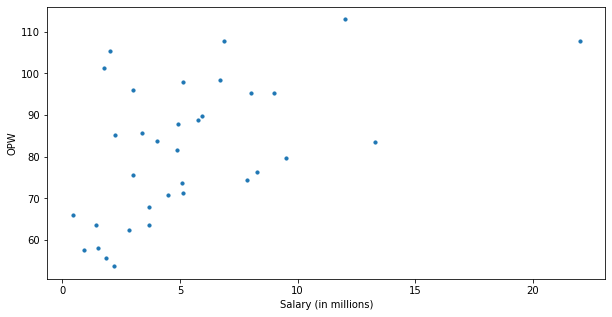

In [20]:
plt.figure(figsize=(10, 5))
plt.scatter(activePlayer['salary']/1e6, activePlayer['OPW'], s=10)
plt.xlabel('Salary (in millions)')
plt.ylabel('OPW')
plt.show()

October 2020: too few points to tell. Slight indication that higher salaries cause more predicted wins. The outlier to the far right is probably overpaid compared to a player with a higher OPW but significantly lower salary.

#### Problem 1(l)
Pick one players from one of each of these 10 position C, 1B, 2B, 3B, SS, LF, CF, RF, DH, or OF keeping the total median salary of all 10 players below 20 million. Report their averaged predicted wins and total salary.<br><br>
October 2020: compared to description Problem 1(j) an additional player's position is added: DH. It seems baseball teams must be established consisting of players of all player's positions. Their total median salary should not exceed 20 million and find the team with the highest predicted wins (OPW).

In [21]:
### Your code here ##
posList=['C', '1B', '2B', '3B', 'SS', 'LF', 'CF', 'RF', 'OF', 'P', 'DH']
columns=['nameFirst', 'nameLast', 'POS', 'ratio1B', 'ratio2B', 'ratio3B', 'ratioHR', 'ratioBB', 'OPW', 'salary']
budget=20e6
possibleTeams=[]

def createTeam():
    teamDF=pd.DataFrame(columns=columns)
    for pos in posList:
        players=activePlayer[activePlayer.POS==pos]
        if players.empty==False:
            randomPlayer=players.sample()
            teamDF=pd.concat([teamDF, randomPlayer[columns]])
    return teamDF

def maxOPWteam():
    maxOPW=0.0
    for team in possibleTeams:
        if team.OPW.mean()> maxOPW:
            maxOPW=max(team.OPW.mean(), maxOPW)
            maxTeam=team
    print('Max OPW team:\n ', maxTeam, '\nMax mean OPW: ', round(maxOPW), ' Corresponding Salary:', maxTeam.salary.sum())
    return maxTeam

def minSalaryTeam():
    minSal=budget
    for team in possibleTeams:
        if team.salary.sum()< minSal:
            minSal=min(team.salary.sum(), minSal)
            minTeam=team
    print('\nMin Salary team:\n ', minTeam, '\nMin Salary: ', minSal, 'Corresponding mean OPW: ', round(minTeam.OPW.mean())) 
    return minTeam

# Simulate the teams
for i in range(100):
    team=createTeam()
    if team.salary.sum()<=budget:
        possibleTeams.append(team)
        
# Find max OPW and min Salary
maxMeanOPWteam=maxOPWteam()
minSalTeam=minSalaryTeam()

Max OPW team:
     nameFirst  nameLast POS   ratio1B   ratio2B   ratio3B   ratioHR   ratioBB  \
67      John    Olerud  1B  0.009833  0.006426 -0.002345 -0.023813  0.042774   
6      Craig    Biggio  2B  0.021231 -0.003963  0.001390 -0.010295  0.001199   
14     Vinny  Castilla  3B  0.012951 -0.005027  0.000335  0.022837 -0.018063   
94    Miguel    Tejada  SS  0.011269  0.003248 -0.003676  0.003845 -0.027914   
84     Ruben    Sierra  OF  0.007774  0.002082  0.013554  0.008953 -0.014448   

           OPW     salary  
67   88.720241  5750000.0  
6    83.839345  4000000.0  
14   96.074736  3000000.0  
94   73.706742  5062500.0  
84  101.344712  1762500.0   
Max mean OPW:  89  Corresponding Salary: 19575000.0

Min Salary team:
     nameFirst nameLast POS   ratio1B   ratio2B   ratio3B   ratioHR   ratioBB  \
83    Richie   Sexson  1B -0.044040 -0.015626 -0.001124  0.028138  0.050041   
6      Craig   Biggio  2B  0.021231 -0.003963  0.001390 -0.010295  0.001199   
7      Aaron    Boone  3B

#### Problem 1(m)
What do these players outperform in? Singles, doubles, triples HR or BB?

In [22]:
### Your code here ###
maxMeanOPWteam[['ratio1B', 'ratio2B', 'ratio3B', 'ratioHR', 'ratioBB']]=maxMeanOPWteam[['ratio1B', 'ratio2B', 'ratio3B', 'ratioHR', 'ratioBB']].apply(lambda x: np.round(x*1000))
maxMeanOPWteam

,nameFirst,nameLast,POS,ratio1B,ratio2B,ratio3B,ratioHR,ratioBB,OPW,salary
67,John,Olerud,1B,10.0,6.0,-2.0,-24.0,43.0,88.720241,5750000.0
6,Craig,Biggio,2B,21.0,-4.0,1.0,-10.0,1.0,83.839345,4000000.0
14,Vinny,Castilla,3B,13.0,-5.0,0.0,23.0,-18.0,96.074736,3000000.0
94,Miguel,Tejada,SS,11.0,3.0,-4.0,4.0,-28.0,73.706742,5062500.0
84,Ruben,Sierra,OF,8.0,2.0,14.0,9.0,-14.0,101.344712,1762500.0


** Your answer here: **
Need more data to tell what players of this team outperform in. 

In [23]:
for rate in ['ratio1B', 'ratio2B', 'ratio3B', 'ratioHR', 'ratioBB']:
    print('Mean rate for ', rate, ' is: ', maxMeanOPWteam[rate].mean())

Mean rate for  ratio1B  is:  12.6
Mean rate for  ratio2B  is:  0.4
Mean rate for  ratio3B  is:  1.8
Mean rate for  ratioHR  is:  0.4
Mean rate for  ratioBB  is:  -3.2


## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---

# Problem 2:  $k$-Nearest Neighbors and Cross Validation 

What is the optimal $k$ for predicting species using $k$-nearest neighbor classification 
on the four features provided by the iris dataset.

In this problem you will get to know the famous iris data set, and use cross validation to select the optimal $k$ for a $k$-nearest neighbor classification. This problem set makes heavy use of the [sklearn](http://scikit-learn.org/stable/) library. In addition to Pandas, it is one of the most useful libraries for data scientists! After completing this homework assignment you will know all the basics to get started with your own machine learning projects in sklearn. 

Future lectures will give further background information on different classifiers and their specific strengths and weaknesses, but when you have the basics for sklearn down, changing the classifier will boil down to exchanging one to two lines of code.

The data set is so popular, that sklearn provides an extra function to load it:

In [24]:
#load the iris data set
iris = sklearn.datasets.load_iris()

X = iris.data  
y = iris.target

print (X.shape, y.shape)

(150, 4) (150,)


Have a look at the `iris` dataset. We already have input X with 4 features and target Y. 

In [ ]:
print(iris.keys())
print(iris.feature_names)
print(iris.target_names)
print(iris.filename)
iris.target

#### Problem 2(a) 
Split the data into a train and a test set. Use a random selection of 33% of the samples as test data. Sklearn provides the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function for this purpose. Print the dimensions of all the train and test data sets you have created. <br><br>
Parameter random_state makes the ouput reproducible (train and test dataset always have the same values). It controls the shuffling applied to the data before applying the split. Any int satisfies.

In [25]:
### Your code here ###
#sklearn.model_selection.train_test_split?
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.33, random_state=5)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(100, 4)
(50, 4)
(100,)
(50,)


#### Problem 2(b)

Examine the data further by looking at the projections to the first two principal components of the data. Use the [`TruncatedSVD`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) function for this purpose, and create a scatter plot. Use the colors on the scatter plot to represent the different classes in the target data. <br><br>
SVD Singular Value Decomposition for linear dimensionality reduction. Target classes: `setosa, versicolor, virginica`

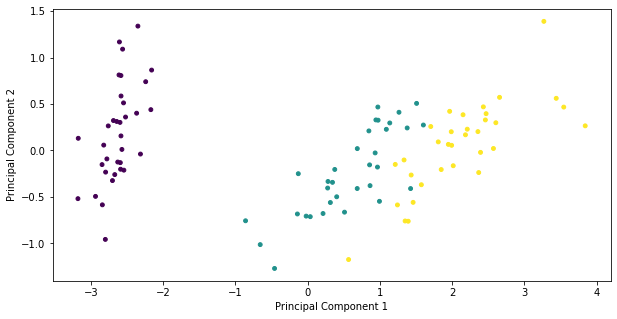

In [26]:
### Your code here ###
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD() # take all default params
X_train_centered=X_train - np.mean(X_train, axis=0) # cs109-2015, lecture 9: Subtract mean from data (center X)
# 2-dimension scatter plot data
X_2d=svd.fit_transform(X_train_centered)


plt.figure(figsize=(10,5))
plt.scatter(X_2d[:,0], X_2d[:,1], c=y_train, s=15)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [27]:
#some test stuff
X_2d[:5] 
print(svd.get_params())
print(X_train[0:5])
print(X_train_centered[0:5])

{'algorithm': 'randomized', 'n_components': 2, 'n_iter': 5, 'random_state': None, 'tol': 0.0}
[[6.3 2.5 5.  1.9]
 [5.  3.2 1.2 0.2]
 [4.6 3.4 1.4 0.3]
 [5.7 4.4 1.5 0.4]
 [5.2 3.4 1.4 0.2]]
[[ 0.472 -0.555  1.278  0.72 ]
 [-0.828  0.145 -2.522 -0.98 ]
 [-1.228  0.345 -2.322 -0.88 ]
 [-0.128  1.345 -2.222 -0.78 ]
 [-0.628  0.345 -2.322 -0.98 ]]


#### Problem 2(c) 

In the lecture we discussed how to use cross validation to estimate the optimal value for $k$ (the number of nearest neighbors to base the classification on). Use ***ten fold cross validation*** to estimate the optimal value for $k$ for the iris data set. 

**Note**: For your convenience sklearn does not only include the [KNN classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), but also a [grid search function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV). The function is called grid search, because if you have to optimize more than one parameter, it is common practice to define a range of possible values for each parameter. An exhaustive search then runs over the complete grid defined by all the possible parameter combinations. This can get very computation heavy, but luckily our KNN classifier only requires tuning of a single parameter for this problem set. 

In [28]:
### Your code here ###
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier() #make instance of KNN Classifier. No args: default number of neighbours = 5
knn.fit(X_train, y_train) #train knn model with training data
knn.predict(X_test) #test model 
knn.score(X_test, y_test) #check accuracy on test data


0.98

In [29]:
#instead of (default) n_neighbors=5, train the model on a range of k-values to find out the best result
from sklearn.model_selection import GridSearchCV
k=np.arange(1, 25) #list of k values 
parameters={'n_neighbors' : k} #dict with values being the parameters to try
knn=KNeighborsClassifier()
clf=GridSearchCV(knn, parameters, cv=10) #classifier GridSearch cross validation: neigh(estimator), params, cv(# folds)
clf.fit(X_train, y_train) #fit model to training data
#clf.cv_results_ #should also give scores for each k_value


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

#### Problem 2(d)

Visualize the result by plotting the score results versus values for $k$. 

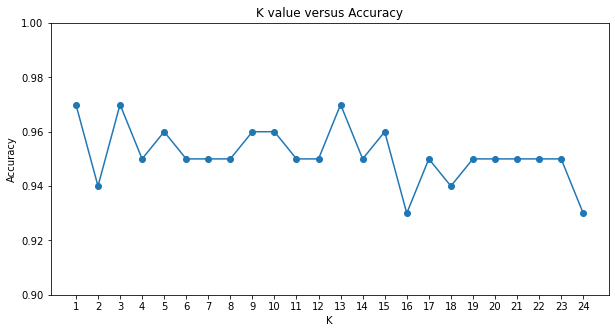

In [30]:
### Your code here ###
plt.figure(figsize=(10, 5))
plt.ylim(0.9, 1.0)
plt.title('K value versus Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.plot(k, clf.cv_results_['mean_test_score'], 'o-')
plt.xticks(k)
plt.show()

Verify that the grid search has indeed chosen the right parameter value for $k$.<br><br>
The result is different from CS109-2014 which gave k=5 as optimal, but equal to [Khalido's](https://github.com/khalido/cs109-2015/blob/master/homework/HW3.ipynb) 2017 solution. 

In [31]:
### Your code here ###
clf.best_params_

{'n_neighbors': 1}

#### Problem 2(e)

Test the performance of our tuned KNN classifier on the test set.

In [32]:
### Your code here ###
from sklearn.model_selection import cross_val_score
print(clf.best_score_)
print(clf.best_estimator_.score(X_test, y_test))
scores = cross_val_score(clf.best_estimator_, X_test, y_test, cv=5)
scores.mean(), scores.std()

0.97
0.94


(0.9400000000000001, 0.04898979485566354)

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
Took some time to understand:
* the CS109-2015, Lecture 9 explanation on kNN and CV
* the iris dataset
* predicting using the kNN classifier with 1 number of neighbours value
* optimizing the accuracy with GridSearchCV using the kNN estimator and a range of k-values
The 1-neighbour kNN accuracy is almost identical to the one from GridSearchCV with n_neighbors size=24. Assuming the same iris dataset is used, I don't understand the CS109-2014 solution resulting in best param k=5 while I got k=1.

# Problem 3: The Curse and Blessing of Higher Dimensions

In this problem we will investigate the influence of higher dimensional spaces on the classification. The data set is again one of the standard data sets from sklearn. The [digits data set](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) is similar to the MNIST data set discussed in the lecture. The main difference is, that each digit is represented by an 8x8 pixel image patch, which is considerably smaller than the 28x28 pixels from MNIST. In addition, the gray values are restricted to 16 different values (4 bit), instead of 256 (8 bit) for MNIST. 

First we again load our data set.

In [33]:
digits = sklearn.datasets.load_digits()

X = digits.data  
y = digits.target

print (X.shape, y.shape)

(1797, 64) (1797,)


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
64
[0 1 2 3 4 5 6 7 8 9]


<Figure size 432x288 with 0 Axes>

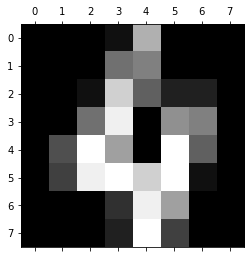

In [34]:
#Some test stuff
print(digits.keys())
print(len(digits.feature_names))
print(digits.target_names)
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[4]) 
plt.show() 


#### Problem 3(a) 

Start with the same steps as in Problem 2. Split the data into train and test set. Use 33% of the samples as test data. Print the dimensions of all the train and test data sets you created. 

In [35]:
### Your code here ###
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.33, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1203, 64)
(1203,)
(594, 64)
(594,)


#### Problem 3(b) 

Similar to Problem 2(b), create a scatter plot of the projections to the first two PCs.  Use the colors on the scatter plot to represent the different classes in the target data. How well can we separate the classes?

**Hint**: Use a `Colormap` in matplotlib to represent the diferent classes in the target data. 

[]

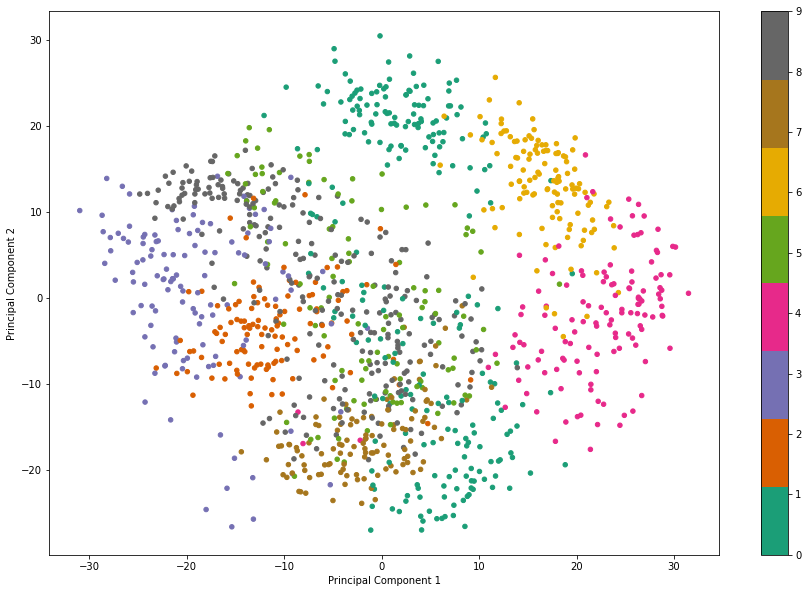

In [36]:
### Your code here ###
# As in Problem 2(b) Singular Value Decomposition using TruncatedSVD()
svd=TruncatedSVD() # take all default params
X_train_centered=X_train - np.mean(X_train, axis=0) # center explicitly as not done by TruncatedSVD
X_2d=svd.fit_transform(X_train_centered)

plt.figure(figsize=(15,10))
plt.scatter(X_2d[:,0], X_2d[:,1], c=y_train, cmap=plt.cm.Dark2, s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.plot()

Create individual scatter plots using only two classes at a time to explore which classes are most difficult to distinguish in terms of class separability.  You do not need to create scatter plots for all pairwise comparisons, but at least show one. 

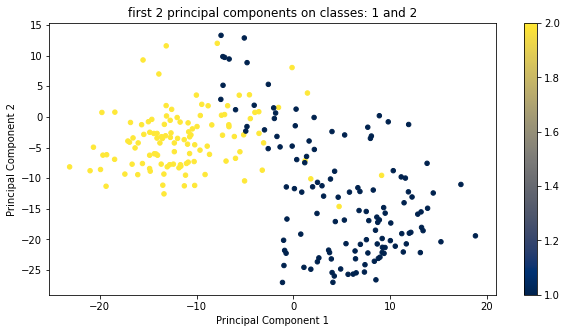

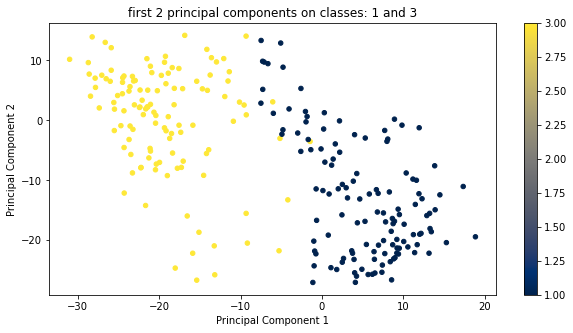

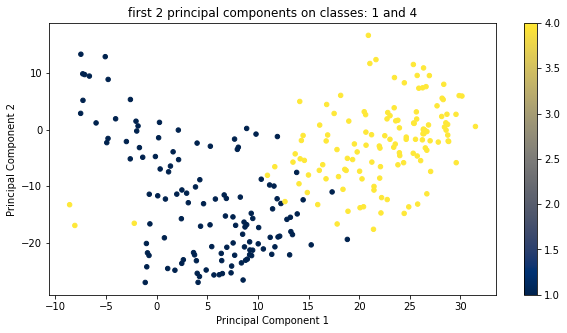

In [37]:
### Your code here ###
# 10 classes. Comparing all of them would result in (n * (n - 1)) / 2 = 45 plots.
for i in range(2, 5):
    ind = np.logical_or(y_train==1, y_train==i) #np array 1203 elements with True for class 1 and i
    plt.figure(figsize=(10,5))
    plt.scatter(X_2d[ind,0], X_2d[ind,1], c=y_train[ind], cmap=plt.cm.cividis, s=20)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('first 2 principal components on classes: %d and %d' % (1, i))
    plt.colorbar()
    plt.plot()

Give a brief interpretation of the scatter plot. Which classes look like hard to distinguish? Do both feature dimensions contribute to the class separability? 

** Your answer here: ** <br>
The classes in all 3 plots are pretty well divided, especially between classes 1 and 3. The boundary is almost perpendicular to the X-axis. PC2 does not contribute much to the class seperability.

#### Problem 3(c) 

Write a **ten-fold cross validation** to estimate the optimal value for $k$ for the digits data set. *However*, this time we are interested in the influence of the number of dimensions we project the data down as well. 

Extend the cross validation as done for the iris data set, to optimize $k$ for different dimensional projections of the data. Create a boxplot showing test scores for the optimal $k$ for each $d$-dimensional subspace with $d$ ranging from one to ten. The plot should have the scores on the y-axis and the different dimensions $d$ on the x-axis. You can use your favorite plot function for the boxplots. [Seaborn](http://web.stanford.edu/~mwaskom/software/seaborn/index.html) is worth having a look at though. It is a great library for statistical visualization and of course also comes with a [`boxplot`](http://web.stanford.edu/~mwaskom/software/seaborn/generated/seaborn.boxplot.html) function that has simple means for changing the labels on the x-axis.

In [38]:
### Your cross validation and evaluation code here ###
from sklearn.decomposition import TruncatedSVD 
knn=KNeighborsClassifier() #our estimator
k=np.arange(1, 25) #list of k values
parameters={'n_neighbors' : k} #dict with values being the parameters to try
clf=GridSearchCV(knn, parameters, cv=10) #classifier GridSearch cross validation: knn(estimator), params, cv(# folds)

best_neighbours=[]
best_scores=[]
dimensions=[]
#iterate over the 10 classes. Apply Singular Value Decomposition 
for c in range(1,11):
    dimensions.append(c)
    svd=TruncatedSVD(n_components=c)
    X_train_centered=X_train - np.mean(X_train, axis=0) # cs109-2015, lecture 9: Subtract mean from data (center X)
    X_2d=svd.fit_transform(X_train_centered) # 2-dimension scatter plot data
    clf.fit(X_2d, y_train)
    best_neighbours.append(clf.best_params_['n_neighbors'])
    best_scores.append(clf.cv_results_['mean_test_score'])

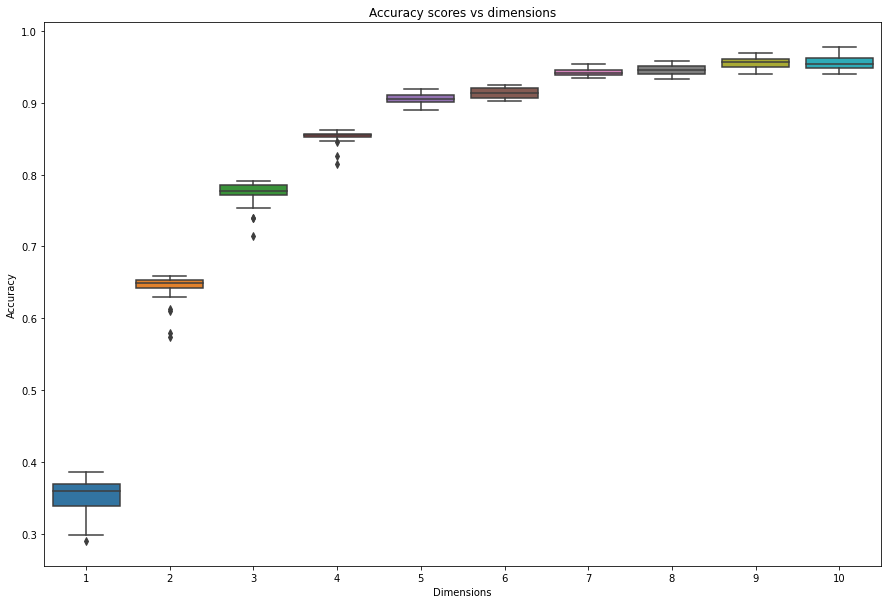

In [39]:
### Your boxplot code here ### 

plt.figure(figsize=(15,10))
sns.boxplot(x=dimensions, y=best_scores)
plt.xlabel('Dimensions')
plt.ylabel('Accuracy')
plt.title('Accuracy scores vs dimensions')
plt.show()

Write a short interpretation of the generated plot, answering the following questions:

* What trend do you see in the plot for increasing dimensions?

* Why do you think this is happening?

** Your answer here: ** <br>
Accuracy improves significantly for higher dimensions. 

#### Problem 3(d) 

**For AC209 Students**: Change the boxplot we generated above to also show the optimal value for $k$ chosen by the cross validation grid search. 

In [31]:
### Your code here ### 

Write a short interpretation answering the following questions:

* Which trend do you observe for the optimal value of $k$?

* Why do you think this is happening?

** Your answer here: **

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
It seems that in higher dimensions the points are more scattered; for k-values the search for nearest neighbours increases. In this example the decision boundaries between classes are influenced mostly by Component 1. 

Until I consulted the explanation in the [digits example](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html), I was confused by the Problem 3 descriptions of classes and dimensionality. E.g. in 3(c) iteration is done for 

# Submission Instructions

To submit your homework, create a folder named **lastname_firstinitial_hw#** and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code.  Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. *If we cannot access your work because these directions are not followed correctly, we will not grade your work.*
